# OpenCitations

## OC Meta

In [18]:
tar_file = "/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/meta_2025_02_13_csv.tar"

In [21]:
from collections import Counter
import polars as pl
import tarfile


def extract_date(df):
    years_list = df.select(pl.col('pub_date').str.extract(r'(\d{4})').alias('year')).to_series().to_list()
    
    #try: 
        #if years_df.filter(pl.col('year').cast(pl.Int64) > 2025).filter(pl.col('year').cast(pl.Int64) < 9999).shape[0] > 0:
            #print('found', years_df.filter(pl.col('year').cast(pl.Int64) > 2025).to_dicts())
        #if len([int(year) for year in years_list if int(year) > 2025]) > 0:
            #print('found', [int(x) for x in df.select(pl.col('pub_date'))['pub_date'].to_list() if int(x) > 2025])
    #except TypeError:
        #pass

    return years_list


years_counter = Counter()

i = 0
with tarfile.open(tar_file, "r:*") as tar:
    while True:
        csv_member = tar.next()
        if csv_member is None:
            break
        if csv_member.isfile() and csv_member.name.endswith('.csv'):
            print(i, csv_member)
            df = pl.read_csv(tar.extractfile(csv_member), columns=['id', 'title', 'pub_date'], schema_overrides = {"pub_date": pl.String})
            years_counter.update(extract_date(df))
        i += 1



print(years_counter)

1 <TarInfo 'meta_output_csv/output_13544.csv' at 0x7f5c3c766bc0>
2 <TarInfo 'meta_output_csv/output_35895.csv' at 0x7f5c141d1f00>
3 <TarInfo 'meta_output_csv/output_23979.csv' at 0x7f5c141d1b40>
4 <TarInfo 'meta_output_csv/output_11498.csv' at 0x7f5c141d31c0>
5 <TarInfo 'meta_output_csv/output_9818.csv' at 0x7f5c141d2080>
6 <TarInfo 'meta_output_csv/output_5046.csv' at 0x7f5c141d1480>
7 <TarInfo 'meta_output_csv/output_26118.csv' at 0x7f5c141d1540>
8 <TarInfo 'meta_output_csv/output_28521.csv' at 0x7f5c141d16c0>
9 <TarInfo 'meta_output_csv/output_29602.csv' at 0x7f5c141d2380>
10 <TarInfo 'meta_output_csv/output_33346.csv' at 0x7f5c141d1900>
11 <TarInfo 'meta_output_csv/output_19522.csv' at 0x7f5c141d10c0>
12 <TarInfo 'meta_output_csv/output_23244.csv' at 0x7f5c141d1840>
13 <TarInfo 'meta_output_csv/output_9349.csv' at 0x7f5c141d0280>
14 <TarInfo 'meta_output_csv/output_32234.csv' at 0x7f5c141d1780>
15 <TarInfo 'meta_output_csv/output_22046.csv' at 0x7f5c141d0b80>
16 <TarInfo 'meta_outp

In [ ]:
none_count = years_counter[None] if None in years_counter else 0
none_count

15867675

In [105]:
future_count = sum(count for year, count in years_counter.items()
                   if year is not None and year.isdigit() and int(year) > 2025)

future_count

124309

In [107]:
sorted_years

{1: 1,
 1000: 9976,
 1100: 1,
 1126: 2,
 1127: 1,
 1128: 2,
 1137: 1,
 1139: 5,
 1151: 1,
 1157: 1,
 1161: 1,
 1191: 1,
 1195: 1,
 1200: 3,
 1224: 3,
 1238: 1,
 1246: 1,
 1248: 1,
 1250: 1,
 1251: 1,
 1271: 16,
 1277: 21,
 1279: 1,
 1282: 1,
 1283: 3,
 1288: 8,
 1300: 47,
 1302: 1,
 1305: 5,
 1306: 1,
 1307: 1,
 1312: 1,
 1313: 5,
 1318: 1,
 1321: 4,
 1332: 1,
 1335: 1,
 1337: 1,
 1339: 140,
 1340: 1,
 1341: 4,
 1343: 1,
 1348: 11,
 1349: 1,
 1352: 2,
 1354: 5,
 1356: 10,
 1359: 1,
 1364: 1,
 1367: 20,
 1368: 7,
 1370: 5,
 1372: 4,
 1374: 9,
 1376: 10,
 1377: 1,
 1380: 2,
 1381: 1,
 1382: 9,
 1383: 1,
 1385: 9,
 1387: 11,
 1388: 1,
 1389: 1,
 1391: 2,
 1394: 1,
 1396: 2,
 1398: 1,
 1399: 1,
 1400: 85,
 1405: 3,
 1406: 1,
 1409: 1,
 1410: 1,
 1411: 25,
 1413: 1,
 1415: 4,
 1416: 8,
 1417: 2,
 1423: 1,
 1426: 1,
 1427: 4,
 1429: 1,
 1434: 2,
 1435: 1,
 1436: 1,
 1437: 1,
 1438: 1,
 1447: 1,
 1448: 4,
 1450: 1,
 1451: 1,
 1454: 3,
 1456: 1,
 1463: 2,
 1464: 1,
 1465: 1,
 1466: 4,
 1467: 1

In [119]:
pl.DataFrame({'year': list(years_counter.keys()), 'count': list(years_counter.values())}).sort('year').write_csv('/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/yearly_counts.csv')

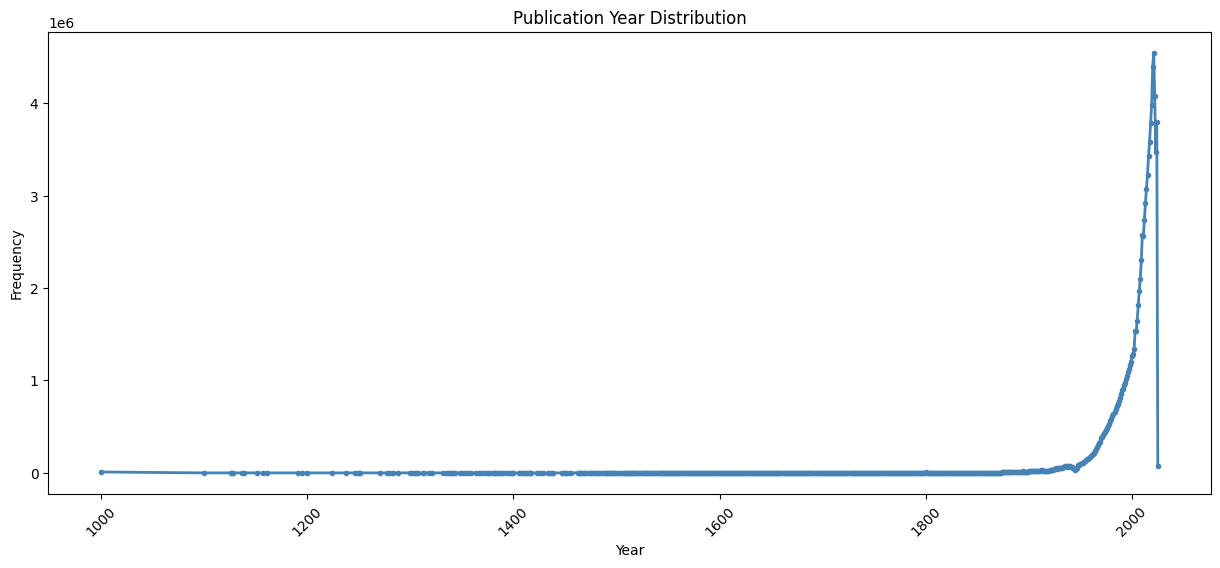

In [116]:
import matplotlib.pyplot as plt

filtered_years = {
    int(year): count
    for year, count in years_counter.items()
    if year is not None and year.isdigit() and 1 < int(year) <= 2025
}

sorted_years = dict(sorted(filtered_years.items()))

plt.figure(figsize=(15, 6))
plt.plot(sorted_years.keys(), sorted_years.values(),
         marker='o',
         linewidth=2,
         markersize=3,
         color='steelblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Publication Year Distribution')
plt.xticks(rotation=45)
plt.show()

## OC Index

---

# IRIS

In [1]:
import polars as pl
from pathlib import Path
from zipfile import ZipFile

iris_path = '/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/iris-data-2024-06-04.zip'

In [2]:
df_iris_master = pl.read_csv(ZipFile(iris_path).open("ODS_L1_IR_ITEM_MASTER_ALL.csv").read(
))
df_iris_identifier = pl.read_csv(ZipFile(iris_path).open("ODS_L1_IR_ITEM_IDENTIFIER.csv").read(), columns=[
                                 'ITEM_ID', 'IDE_DOI', 'IDE_ISBN', 'IDE_PMID'], schema_overrides={'ITEM_ID': pl.Int64, 'IDE_DOI': pl.Utf8, 'IDE_ISBN': pl.Utf8, 'IDE_PMID': pl.Utf8})

iris_df = df_iris_identifier.join(df_iris_master, on='ITEM_ID', how='inner')

In [3]:
# DATE_ISSUED_YEAR	Y	NUMBER(10,0)	anno indicato in date.issued	Anno di pubblicazione del prodotto

df_iris_master

ITEM_ID,DATE_ISSUED_YEAR,TITLE,OWNING_COLLECTION,OWNING_COLLECTION_DES
i64,i64,str,i64,str
2766,2008,"""Bothriocephalidean tapeworms (…",35,"""1.01 Articolo in rivista"""
3349,2012,"""Low-Quality leadership in a ve…",35,"""1.01 Articolo in rivista"""
3867,2009,"""Due autografi inediti di Luigi…",41,"""2.01 Capitolo / saggio in libr…"
4342,2006,"""Il sistema informativo contabi…",49,"""3.01 Monografia / trattato sci…"
4585,2012,"""Commento all'art. 1271 cod. ci…",41,"""2.01 Capitolo / saggio in libr…"
…,…,…,…,…
724623,2023,"""Detection of Necrosis in Digit…",35,"""1.01 Articolo in rivista"""
724249,2014,"""The Islamic ecumene. Erbil and…",41,"""2.01 Capitolo / saggio in libr…"
724571,2022,"""La Costituzione di Dobbs v. Ja…",35,"""1.01 Articolo in rivista"""


In [4]:
years = df_iris_master.select(pl.col('DATE_ISSUED_YEAR'))

years.null_count() # 2 nulls

years.drop_nulls().filter(pl.col('DATE_ISSUED_YEAR').cast(pl.Int64) > 2027).count() #2596 '9999' values

DATE_ISSUED_YEAR
u32
2596


In [5]:
years_df = years.drop_nulls().filter(pl.col('DATE_ISSUED_YEAR') <= 2025).group_by('DATE_ISSUED_YEAR').len().sort('DATE_ISSUED_YEAR')
years_df

DATE_ISSUED_YEAR,len
i64,u32
1967,1
1975,1
1976,2
1977,10
1978,6
…,…
2021,15892
2022,14556
2023,12844


In [120]:
years_df.write_csv('/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/years_iris.csv')

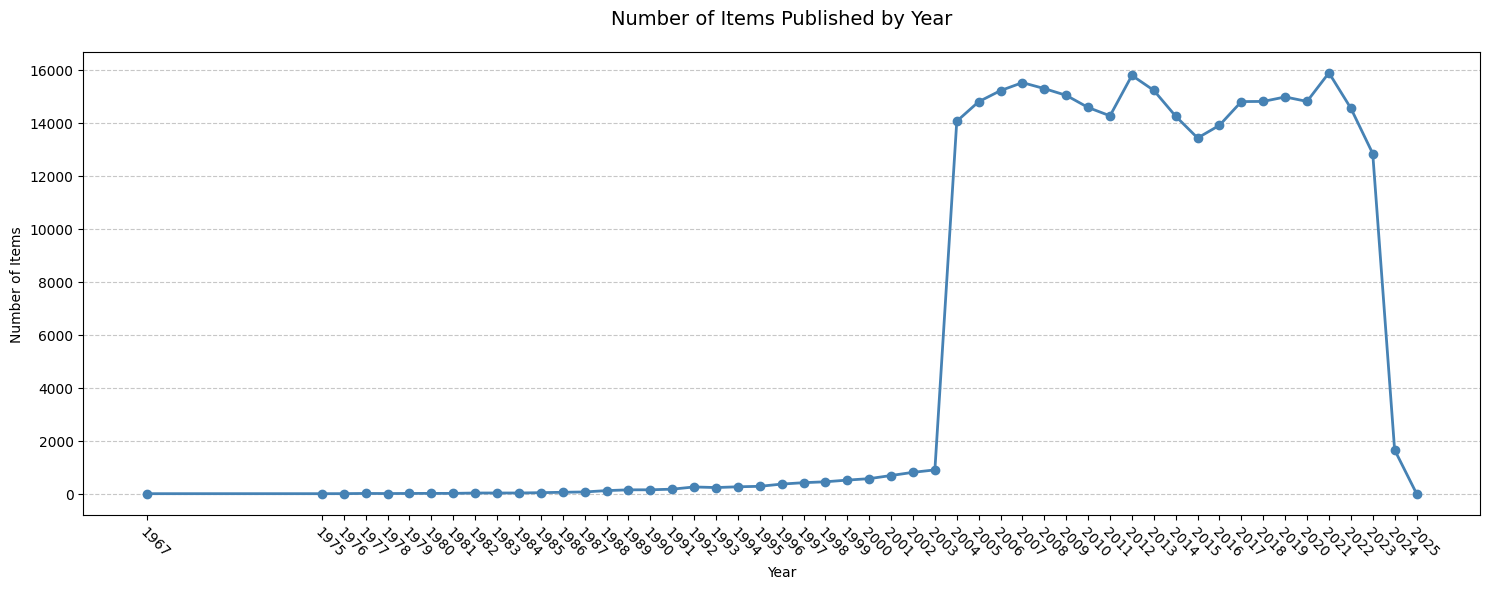

In [7]:
# plot year distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(years_df['DATE_ISSUED_YEAR'], years_df['len'],
         marker='o',
         linewidth=2,
         markersize=6,
         color='steelblue')

plt.title('Number of Items Published by Year', pad=20, size=14)
plt.xlabel('Year')
plt.ylabel('Number of Items')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

#plt.legend(['Iris No ID', 'IRIS dump'], loc='upper left')


plt.xticks(years_df['DATE_ISSUED_YEAR'], rotation=-45, ha='left', va='top', rotation_mode='anchor')
plt.tight_layout()
plt.show()
